In [ ]:
# Nome: Gabriel de Lima Miranda
# RA: 22304286

# Orientações para a Prova

Por favor, leia **atentamente** todas as instruções abaixo para realizar e enviar sua prova corretamente.

## Identificação

- **Preencha** seu nome e RA no bloco de código acima.

## Formato e Envio do Arquivo

- Envie o arquivo da prova com o formato `nome_sobrenome.ipynb` (sendo o primeiro sobrenome).
  
  **Exemplos:**
  
  - Nome: Ana Maria da Silva Sauro  
    Arquivo: `ana_maria_silva.ipynb`
    
  - Nome: Arthur Porfírio de Castro Siqueira  
    Arquivo: `arthur_porfirio.ipynb`
    
  - Nome: Marco Antônio Rodriges Fernandes  
    Arquivo: `marco_antonio_rodrigues.ipynb`
    
  - Nome: Flávia Melo Alcântara  
    Arquivo: `flavia_melo.ipynb`

- A prova deve ser enviada **exclusivamente** pelo formulário disponível [neste link](https://forms.gle/c5y6gW2GMSL45BTg7).

  <span style="color:red">**ATENÇÃO:**</span> A prova **NÃO** deve ser enviada para o e-mail do professor, apenas pelo formulário.

## Regras da Prova

- A prova pode ser realizada com consulta apenas em materiais das aulas anteriores ou anotações próprias.

- <span style="color:red">**Quem for pego colando terá a nota II.**</span>

- **Sem conversas paralelas** durante a prova, isto pode ser considerado cola.

- **Não** devem ser criados mais blocos de códigos que os disponíveis na prova (no desenvolvimento do código podem ser criados mais blocos de código, mas antes de enviar devem conter apenas os blocos de códigos que estavam disponíveis na prova).

- O notebook deve conter as saídas dos blocos de código referentes às questões que possuem gráficos e/ou valores que exibam as respostas (não é para limpar a saída dos blocos de código para me enviar).

## Boa Prova!

# Explicação da Prova

## Contexto

A base de dados `atraso_voos.csv` contém informações detalhadas sobre voos que foram realizados por passageiros. Cada registro (ou linha) representa o registro de **um passageiro** em um voo específico.

### Atributos da Base de Dados

Os atributos presentes na base de dados oferecem informações diversas, tais como:

- **Informações do Passageiro:** Dados específicos sobre a pessoa que realizou o voo.
  
- **Serviços Consumidos:** Detalhes sobre os serviços que foram utilizados pelo passageiro durante o voo.
  
- **Detalhes do Voo:** Informações pertinentes sobre o voo em questão.

## Objetivo da Prova

A **classe alvo**, ou seja, a variável que desejamos prever, é o **tempo de atraso para a partida** do voo.

O principal intuito desta prova é:

- Testar diferentes arquiteturas de modelos de Machine Learning.
  
- Verificar se é possível utilizar os atributos disponíveis para prever o tempo de atraso na partida dos voos utilizando técnicas de Machine Learning.
  
- Analisar o desempenho do(s) modelo(s) construído(s) com base nos dados fornecidos.

## OBS: ``Não se sabe se a base de dados possui atributos ruins e nem se só possui atributos bons.``
**Boa sorte e bom trabalho!**

# Importação de Bibliotecas

Por favor, siga as instruções abaixo com relação à importação de bibliotecas para a realização da prova.

## Orientações:

- **Centralize as Importações:** Todas as bibliotecas utilizadas devem ser importadas no bloco de código abaixo desta orientação.

- **Penalizações:**
  
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca importada que **não for utilizada**.
    
  - <span style="color:red">**Menos 0.2 pontos**</span> serão descontados para cada biblioteca que for importada **fora do bloco de código destinado** para isso (ou seja, ao longo do código).

## Justificativa:

A organização das importações no início do notebook:
  
- Facilita a visualização das dependências do código.
  
- Previne possíveis erros de execução devido à falta de alguma biblioteca.

- Auxilia na manutenção e compreensão do código por outros desenvolvedores.

**Atenção:** Certifique-se de revisar o código antes da submissão para evitar penalizações desnecessárias.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.regularizers import l2, l1
from keras.optimizers import Adam

# Questão 1: Preparação dos Dados

Nesta etapa, você deverá realizar uma série de procedimentos para preparar os dados para os modelos de Machine Learning. Siga os passos abaixo com atenção:

**Atenção:** Certifique-se de realizar cada passo com cuidado e verificar os dados em cada etapa para garantir que a preparação dos dados seja realizada corretamente.



## A. Leitura da Base de Dados

- Realize a leitura da base de dados `atraso_voos.csv`.


In [ ]:
df = pd.read_csv('atraso_voos.csv')

In [ ]:
df.head()

,satisfacao,genero,tipo_cliente,idade,tipo_viagem,classe,distancia_voo,conforto_assento,conveniencia_horario_partida_chegada,comida_bebida,...,entretenimento_voo,suporte_online,facilidade_reserva_online,servico_bordo,espaco_pernas,manuseio_bagagem,servico_checkin,limpeza,embarque_online,atraso_partida_minutos
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0



## B. Conversão de Valores

- Converta **valores textuais** para **valores numéricos**.
  
  **Nota:** A base de dados não contém valores nulos.


In [ ]:
dados_atraso_voos = pd.read_csv('atraso_voos.csv')

colunas_categoricas = ['satisfacao', 'genero', 'tipo_cliente', 'tipo_viagem', 'classe']

dados_atraso_voos = pd.get_dummies(dados_atraso_voos, columns=colunas_categoricas, drop_first=True)


## C. Separação dos Dados

- Separe os dados em `X` (atributos) e `y` (variável dependente).


In [ ]:
X = dados_atraso_voos.drop(columns=['atraso_partida_minutos'])
y = dados_atraso_voos['atraso_partida_minutos']


## D. Divisão dos Dados

- Divida os dados em conjuntos de treinamento (60%), validação (10%) e teste (30%) para `X` e `y`.


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de validação:", len(X_val))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 77692
Tamanho do conjunto de validação: 12948
Tamanho do conjunto de teste: 38847



## E. Normalização dos Dados

- Utilize a técnica de normalização **Min-Max** para normalizar os dados.
  
  - Primeiramente, aplique o método `fit_transform` nos dados de treinamento (`X_train`).
    
  - Em seguida, utilize o método `transform` nos dados de teste (`X_test`) e validação (`X_val`).


In [ ]:
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)

X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)


# Questão 2: Construção e Avaliação do Modelo Simples

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural simples. Siga as subinstruções com atenção para cada item.


## A - Construção do Modelo

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir **10 camadas ocultas**.

- Na quinta camada oculta o modelo deve possuir 128 neurônios. (demais camadas fica ao seu critério)
  
- **Não** utilize técnicas de dropout e regularização do kernel no modelo.


In [ ]:
def criar_modelo():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model


## B - Treinamento do Modelo

- **Crie um modelo chamdo modelo_simples** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento e validação por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


Epoch 1/20
2428/2428 [==============================] - 17s 5ms/step - loss: 1352.5068 - mae: 19.4078 - val_loss: 1340.1216 - val_mae: 18.8402
Epoch 2/20
2428/2428 [==============================] - 9s 4ms/step - loss: 1237.8846 - mae: 18.8699 - val_loss: 1242.4496 - val_mae: 19.2649
Epoch 3/20
2428/2428 [==============================] - 8s 3ms/step - loss: 1189.4989 - mae: 18.5430 - val_loss: 1212.2374 - val_mae: 17.7739
Epoch 4/20
2428/2428 [==============================] - 9s 4ms/step - loss: 1156.3824 - mae: 18.3143 - val_loss: 1187.8363 - val_mae: 18.5517
Epoch 5/20
2428/2428 [==============================] - 10s 4ms/step - loss: 1125.6373 - mae: 18.1163 - val_loss: 1171.8718 - val_mae: 18.3909
Epoch 6/20
2428/2428 [==============================] - 9s 4ms/step - loss: 1110.9421 - mae: 18.0193 - val_loss: 1182.4833 - val_mae: 17.1242
Epoch 7/20
2428/2428 [==============================] - 8s 3ms/step - loss: 1096.2689 - mae: 17.9247 - val_loss: 1151.1544 - val_mae: 16.9657
Epoc

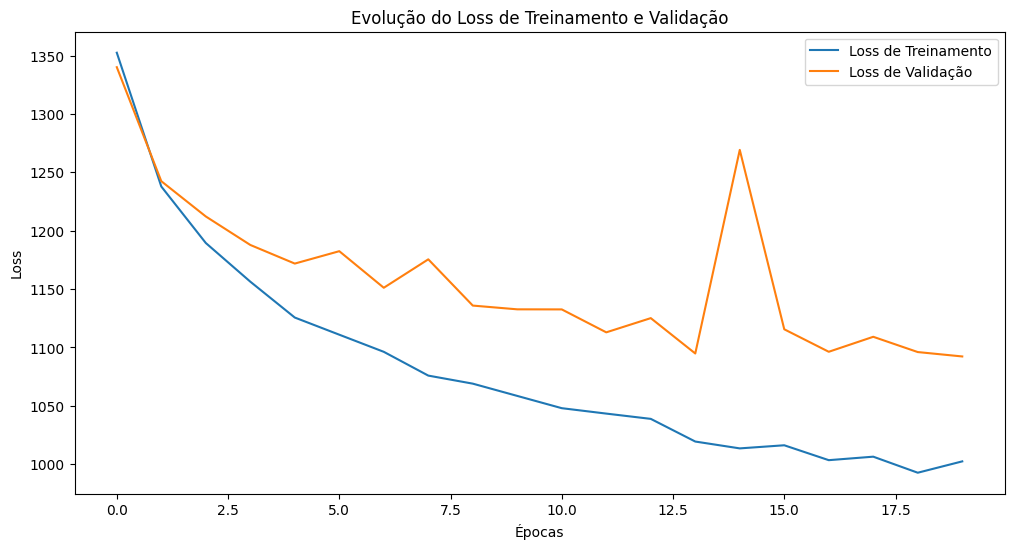

In [ ]:
modelo_simples = criar_modelo()

history = modelo_simples.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    epochs=20,
    verbose=1
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolução do Loss de Treinamento e Validação')
plt.show()


## C - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


Epoch 1/20
2428/2428 [==============================] - 11s 4ms/step - loss: 8.1376e-04 - val_loss: 8.6309e-04
Epoch 2/20
2428/2428 [==============================] - 8s 3ms/step - loss: 7.6064e-04 - val_loss: 7.3856e-04
Epoch 3/20
2428/2428 [==============================] - 9s 4ms/step - loss: 7.1576e-04 - val_loss: 7.4204e-04
Epoch 4/20
2428/2428 [==============================] - 8s 3ms/step - loss: 6.9876e-04 - val_loss: 7.3122e-04
Epoch 5/20
2428/2428 [==============================] - 9s 4ms/step - loss: 6.9342e-04 - val_loss: 7.1727e-04
Epoch 6/20
2428/2428 [==============================] - 9s 4ms/step - loss: 6.7965e-04 - val_loss: 7.0539e-04
Epoch 7/20
2428/2428 [==============================] - 7s 3ms/step - loss: 6.6857e-04 - val_loss: 6.9365e-04
Epoch 8/20
2428/2428 [==============================] - 9s 4ms/step - loss: 6.6328e-04 - val_loss: 7.0579e-04
Epoch 9/20
2428/2428 [==============================] - 9s 4ms/step - loss: 6.5295e-04 - val_loss: 6.8968e-04
Epoch 10/

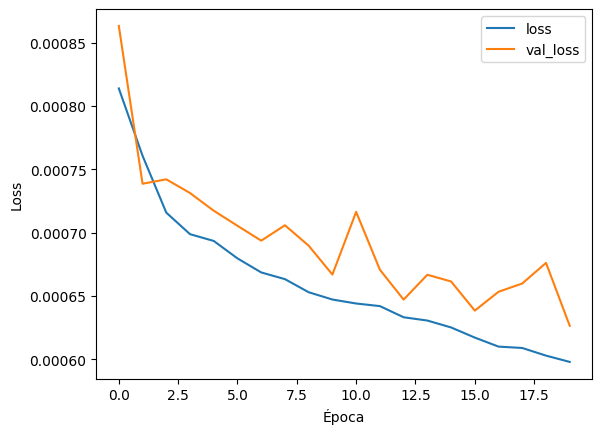

1214/1214 [==============================] - 2s 2ms/step
MSE: 1118.336937512663
Risco Empírico: 1118.336937512663


In [ ]:
X = df.drop(columns=['atraso_partida_minutos'])
y = df['atraso_partida_minutos']

categorical_columns = ['satisfacao', 'genero', 'tipo_cliente', 'tipo_viagem', 'classe']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

scaler_y = MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val_normalized = scaler_y.transform(y_val.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = build_model()

history = model.fit(X_train_normalized, y_train_normalized, validation_data=(X_val_normalized, y_val_normalized), epochs=20, verbose=1)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_test_pred_normalized = model.predict(X_test_normalized)

y_test_pred_original = scaler_y.inverse_transform(y_test_pred_normalized).flatten()
y_test_original = scaler_y.inverse_transform(y_test_normalized).flatten()

mse = mean_squared_error(y_test_original, y_test_pred_original)
print(f'MSE: {mse}')

y_test_pred_denormalized = scaler_y.inverse_transform(y_test_pred_normalized).flatten()

risk_empirical = np.mean(np.square(y_test_original - y_test_pred_denormalized))
print(f'Risco Empírico: {risk_empirical}')


## D - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [ ]:
bias = np.mean(y_test_pred_denormalized - y_test_original)

variance = np.mean(np.square(y_test_pred_denormalized - np.mean(y_test_pred_denormalized)))

structural_risk = risk_empirical - bias**2 - variance
print(f'Risco Estrutural: {structural_risk}')

Risco Estrutural: 770.4881167090048



## E - Classificação do Modelo

- Com base nos valores e gráficos anteriores, **classifique o modelo** como:
  
  - Um modelo com Overfitting
  
  - Um modelo sem overfitting

Com base nas curvas de loss, parece que o modelo não está sofrendo de overfitting e está generalizando bem os dados de validação.


## F - Justificativa

- **Justifique a sua resposta** do item 2.E, explicando os motivos que o levaram a classificar o modelo desta maneira.

Utilize **suas próprias palavras**.

Geralmente, quando o modelo possui overfitting, veríamos um cenário em que a perda de treinamento continua a diminuir, mas a perda de validação começa a aumentar. No entanto, isso não parece estar acontecendo com base nas informações.

# Questão 3: Construção e Avaliação do Modelo com regularização de kernel l1, l2 ou l1 e l2

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização de kernel l1, l2 ou l1 e l2

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de regularização do kernel no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [ ]:
def create_regularized_model(input_dim, output_dim):
    model = Sequential()

    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

    model.add(Dense(output_dim, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


## B - Justificativa das escolhas dos regularizadores de kernel

- **Justifique** a utilização o l1, l2 ou o Elastic Net (l1 e l2 juntos).

- **Justifique** a utilização do regularizador de kernel nas camadas que foram aplicadas.

A escolha da regularização L2 nas camadas ocultas é uma estratégia comum para melhorar a generalização do modelo, especialmente em redes neurais profundas. Ela equilibra a redução de overfitting com a manutenção de informações úteis aprendidas pelas camadas ocultas. Contudo, a escolha do regularizador ideal pode depender da análise dos resultados experimentais e do ajuste de hiperparâmetros para encontrar a configuração que melhor se adapte ao seu problema específico.


## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_reg_ker** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.


Epoch 1/20
1214/1214 [==============================] - 10s 6ms/step - loss: 1353.5535 - val_loss: 1300.7817
Epoch 2/20
1214/1214 [==============================] - 7s 6ms/step - loss: 1260.4149 - val_loss: 1250.2699
Epoch 3/20
1214/1214 [==============================] - 9s 7ms/step - loss: 1203.3258 - val_loss: 1261.3849
Epoch 4/20
1214/1214 [==============================] - 11s 9ms/step - loss: 1166.7228 - val_loss: 1169.6920
Epoch 5/20
1214/1214 [==============================] - 7s 6ms/step - loss: 1145.7855 - val_loss: 1177.7062
Epoch 6/20
1214/1214 [==============================] - 8s 7ms/step - loss: 1123.2961 - val_loss: 1159.1688
Epoch 7/20
1214/1214 [==============================] - 8s 7ms/step - loss: 1111.1809 - val_loss: 1158.4536
Epoch 8/20
1214/1214 [==============================] - 7s 6ms/step - loss: 1073.6256 - val_loss: 1094.2310
Epoch 9/20
1214/1214 [==============================] - 9s 7ms/step - loss: 1080.8500 - val_loss: 1127.4694
Epoch 10/20
1214/1214 [===

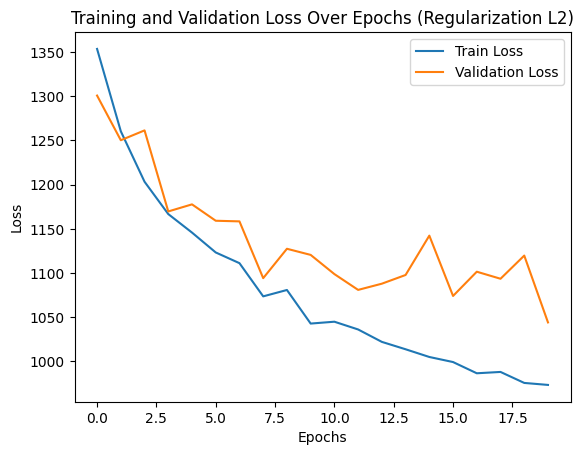

In [ ]:
def build_model_reg_ker(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam())
    return model

modelo_reg_ker = build_model_reg_ker((X_train_normalized.shape[1],))

history_reg_ker = modelo_reg_ker.fit(X_train_normalized, y_train, epochs=20, batch_size=64, validation_data=(X_val_normalized, y_val), verbose=1)

plt.plot(history_reg_ker.history['loss'], label='Train Loss')
plt.plot(history_reg_ker.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs (Regularization L2)')
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


Epoch 1/20
2833/2833 [==============================] - 10s 3ms/step - loss: 1364.4478 - val_loss: 1432.1240
Epoch 2/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1242.7950 - val_loss: 1351.2080
Epoch 3/20
2833/2833 [==============================] - 7s 3ms/step - loss: 1198.7042 - val_loss: 1319.3601
Epoch 4/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1157.1777 - val_loss: 1343.3544
Epoch 5/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1134.0703 - val_loss: 1306.9138
Epoch 6/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1119.4419 - val_loss: 1283.6846
Epoch 7/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1099.9803 - val_loss: 1250.4198
Epoch 8/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1090.1046 - val_loss: 1249.4209
Epoch 9/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1084.0068 - val_loss: 1242.8914
Epoch 10/20
2833/2833 [====

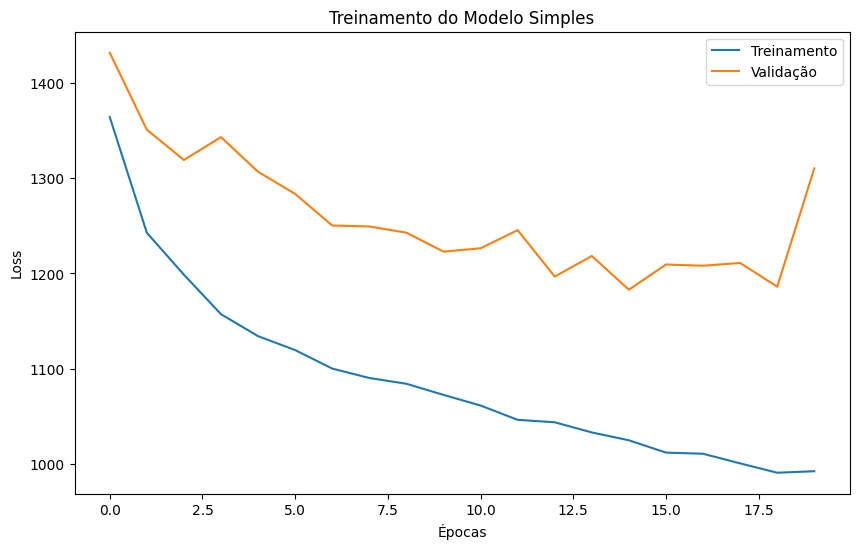

In [ ]:
colunas_categoricas = ['genero', 'tipo_cliente', 'tipo_viagem', 'classe']
dados_atraso_voos = pd.get_dummies(dados_atraso_voos, columns=colunas_categoricas, drop_first=True)

X = dados_atraso_voos.drop(columns=['atraso_partida_minutos'])
y = dados_atraso_voos['atraso_partida_minutos']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

def criar_modelo_simples():
    input_layer = Input(shape=(X_train_normalized.shape[1],))
    x = Dense(128, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    output_layer = Dense(1, activation='linear')(x)
    modelo = Model(inputs=input_layer, outputs=output_layer)
    modelo.compile(loss='mean_squared_error', optimizer='adam')
    return modelo

modelo_simples = criar_modelo_simples()
history_simples = modelo_simples.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    epochs=20,
    verbose=1
)

y_test_pred = modelo_simples.predict(X_test_normalized)

y_test_pred_original = y_test_pred * (y_train.max() - y_train.min()) + y_train.min()
y_test_original = y_test * (y_train.max() - y_train.min()) + y_train.min()

mse_simples = mean_squared_error(y_test_pred_original, y_test_original)

print(f"Risco Empírico do Modelo Simples (MSE): {mse_simples}")

plt.figure(figsize=(10, 6))
plt.plot(history_simples.history['loss'], label='Treinamento')
plt.plot(history_simples.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Treinamento do Modelo Simples')
plt.show()


## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [ ]:
y_train_max = y_train.max()
y_train_min = y_train.min()

modelo_com_regularizacao = criar_modelo_com_regularizacao()
history_com_regularizacao = modelo_com_regularizacao.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    epochs=20,
    verbose=1
)

y_train_pred = modelo_com_regularizacao.predict(X_train_normalized)

y_train_pred_original = y_train_pred * (y_train_max - y_train_min) + y_train_min
y_train_original = y_train * (y_train_max - y_train_min) + y_train_min

risco_estrutural = mean_squared_error(y_train_pred_original, y_train_original)

print(f"Risco Estrutural do Modelo com Regularização (MSE no Treinamento): {risco_estrutural}")

Epoch 1/20
2833/2833 [==============================] - 11s 3ms/step - loss: 1375.0896 - val_loss: 1449.9661
Epoch 2/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1268.7357 - val_loss: 1369.6582
Epoch 3/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1213.8380 - val_loss: 1332.9380
Epoch 4/20
2833/2833 [==============================] - 7s 2ms/step - loss: 1180.9674 - val_loss: 1317.0856
Epoch 5/20
2833/2833 [==============================] - 9s 3ms/step - loss: 1154.5610 - val_loss: 1286.8547
Epoch 6/20
2833/2833 [==============================] - 7s 3ms/step - loss: 1134.4109 - val_loss: 1286.9512
Epoch 7/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1122.1639 - val_loss: 1280.3129
Epoch 8/20
2833/2833 [==============================] - 8s 3ms/step - loss: 1108.5177 - val_loss: 1241.6487
Epoch 9/20
2833/2833 [==============================] - 7s 2ms/step - loss: 1100.5107 - val_loss: 1266.1754
Epoch 10/20
2833/2833 [====

# Questão 4: Construção e Avaliação do Modelo com Dropout

Nesta questão, você irá construir, treinar e avaliar um modelo de rede neural. Siga as subinstruções com atenção para cada item.



## A - Construção do Modelo com regularização a utilização do Dropout

- **Crie uma função** que retorne um modelo de rede neural compilado.
  
- O modelo deve possuir as mesmas **10 camadas ocultas** da questão 2.
  
- Utilize técnicas de dropout no modelo seguindo as melhores práticas de acordo com as informações dos dados.


In [ ]:
def criar_modelo_com_dropout():
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)))
    model.add(Dropout(0.5))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

## B - Justificativa do Dropout

- **Justifique** a utilização a localização do dropout.

A utilização do Dropout após cada camada oculta é uma prática comum para melhorar a capacidade de generalização de modelos de redes neurais e reduzir o overfitting.







## C - Treinamento do Modelo

- **Crie um modelo chamdo modelo_dropout** utilizando a função criada anteriormente

- **Treine o modelo** utilizando os dados de treinamento por **20 épocas**.
  
- **Exiba um gráfico** que mostre a evolução do loss de validação e treinamento ao longo das 20 épocas de treinamento.

Epoch 1/20
1417/1417 [==============================] - 9s 5ms/step - loss: 1550.0459 - val_loss: 1624.0031
Epoch 2/20
1417/1417 [==============================] - 5s 4ms/step - loss: 1490.0923 - val_loss: 1598.6593
Epoch 3/20
1417/1417 [==============================] - 7s 5ms/step - loss: 1469.7933 - val_loss: 1591.7910
Epoch 4/20
1417/1417 [==============================] - 6s 4ms/step - loss: 1456.6022 - val_loss: 1584.8073
Epoch 5/20
1417/1417 [==============================] - 7s 5ms/step - loss: 1447.4170 - val_loss: 1575.0532
Epoch 6/20
1417/1417 [==============================] - 6s 4ms/step - loss: 1437.3488 - val_loss: 1565.8289
Epoch 7/20
1417/1417 [==============================] - 6s 4ms/step - loss: 1429.9055 - val_loss: 1564.4095
Epoch 8/20
1417/1417 [==============================] - 6s 4ms/step - loss: 1418.2842 - val_loss: 1519.6509
Epoch 9/20
1417/1417 [==============================] - 6s 4ms/step - loss: 1411.5770 - val_loss: 1540.1006
Epoch 10/20
1417/1417 [=====

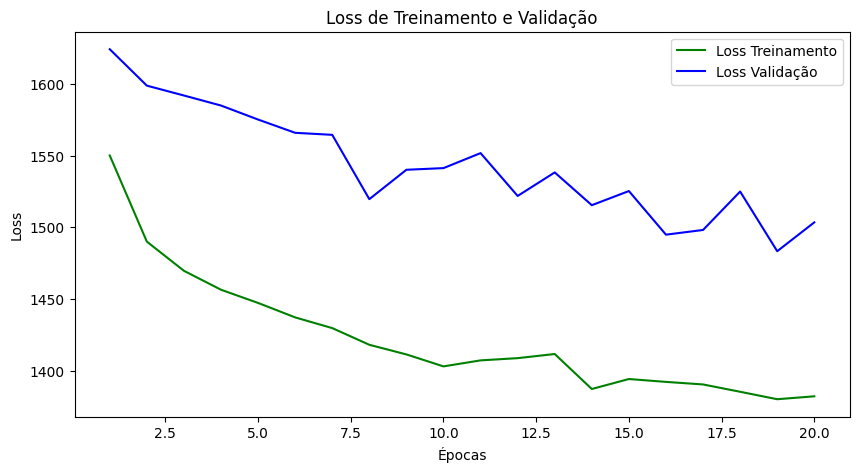

In [ ]:
dados_atraso_voos = pd.read_csv('atraso_voos.csv')

colunas_categoricas = ['satisfacao', 'genero', 'tipo_cliente', 'tipo_viagem', 'classe']

dados_atraso_voos = pd.get_dummies(dados_atraso_voos, columns=colunas_categoricas, drop_first=True)

X = dados_atraso_voos.drop(columns=['atraso_partida_minutos'])
y = dados_atraso_voos['atraso_partida_minutos']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

def criar_modelo_dropout():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

modelo_dropout = criar_modelo_dropout()

history_dropout = modelo_dropout.fit(
    X_train_normalized,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

loss_train = history_dropout.history['loss']
loss_val = history_dropout.history['val_loss']

epochs = range(1, len(loss_train) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train, 'g', label='Loss Treinamento')
plt.plot(epochs, loss_val, 'b', label='Loss Validação')
plt.title('Loss de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


## D - Risco Empírico

- Calcule e **exiba o risco empírico** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [ ]:
modelo_dropout.fit(X_train_normalized, y_train, epochs=20, batch_size=64, verbose=0)

y_test_dropout_pred = modelo_dropout.predict(X_test_normalized)

y_test_dropout_pred_original = y_test_dropout_pred * (y_train_max - y_train_min) + y_train_min
y_test_original = y_test * (y_train_max - y_train_min) + y_train_min

mse_dropout = mean_squared_error(y_test_original, y_test_dropout_pred_original)

print(f"Risco Empírico do Modelo com Dropout (MSE no Teste): {mse_dropout}")

607/607 [==============================] - 1s 2ms/step
Risco Empírico do Modelo com Dropout (MSE no Teste): 2238336835.7655325



## E - Risco Estrutural

- Calcule e **exiba o risco estrutural** do modelo.
  
- **Lembre-se** de dessnormalizar os valores para os cálculos das métricas.


In [ ]:
y_train_dropout_pred = modelo_dropout.predict(X_train_normalized)

y_train_dropout_pred_original = y_train_dropout_pred * (y_train_max - y_train_min) + y_train_min
y_train_original = y_train * (y_train_max - y_train_min) + y_train_min

mse_structural = mean_squared_error(y_train_original, y_train_dropout_pred_original)

print(f"Risco Estrutural do Modelo com Dropout (MSE no Treinamento): {mse_structural}")

2833/2833 [==============================] - 6s 2ms/step
Risco Estrutural do Modelo com Dropout (MSE no Treinamento): 2224660090.8714557


# Questão 5: Separação da Base de Treinamento

Divida o conjunto de dados de treinamento em 4 subconjuntos, cada um contendo 25% dos dados originais de treinamento.

## Instruções

- Divida a base de treinamento (`X_train` e `y_train`) em 4 subconjuntos, cada um com 25% dos dados.

- Nomeie os subconjuntos como `X_train_1`, `y_train_1`, `X_train_2`, `y_train_2`, e assim por diante.

In [ ]:
X_train_1, _, y_train_1, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train_2, _, y_train_2, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=100)
X_train_3, _, y_train_3, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
X_train_4, _, y_train_4, _ = train_test_split(X_train, y_train, test_size=0.25, random_state=456)

# Questão 6: Seleção e Treinamento de Modelos

Nesta questão, você irá selecionar o melhor dos 3 modelos com base nas questões anteriores.



## A - Seleção e Instanciação do Modelo

- **Selecione o melhor modelo** com base nos experimentos e métricas observadas nas questões anteriores.
- **Crie 4 instâncias** deste modelo utilizando a função correspondente.

```python
# Supondo que o melhor modelo seja 'create_model_dropout'
modelo_dropout_1 = create_model_dropout()
modelo_dropout_2 = create_model_dropout()
modelo_dropout_3 = create_model_dropout()
modelo_dropout_4 = create_model_dropout()


In [ ]:
modelo_simples_1 = criar_modelo_simples()
modelo_simples_2 = criar_modelo_simples()
modelo_simples_3 = criar_modelo_simples()
modelo_simples_4 = criar_modelo_simples()

## B - Treinamento do Modelo 1 e Visualização do Gráfico

- **Treine o modelo 1** por 20 épocas utilizando `X_train_1` e `y_train_1`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
1063/1063 [==============================] - 4s 3ms/step - loss: 1450.4196 - val_loss: 1775.5630
Epoch 2/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1423.6984 - val_loss: 1769.0182
Epoch 3/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1409.4984 - val_loss: 1757.8677
Epoch 4/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1408.3597 - val_loss: 1758.1029
Epoch 5/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1409.1918 - val_loss: 1755.2244
Epoch 6/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1406.0677 - val_loss: 1753.8647
Epoch 7/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1407.0247 - val_loss: 1752.3419
Epoch 8/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1406.4468 - val_loss: 1747.1974
Epoch 9/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1405.0638 - val_loss: 1747.3567
Epoch 10/20
1063/1063 [=====

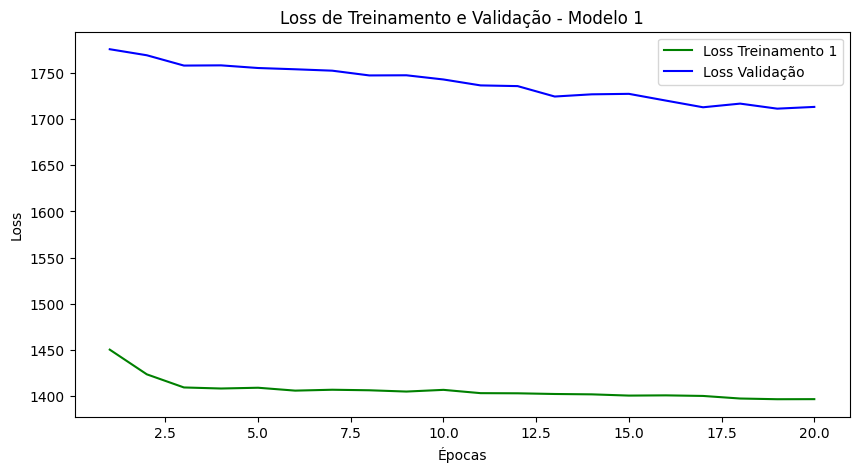

In [ ]:
history_1 = modelo_simples_1.fit(
    X_train_1,
    y_train_1,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

loss_train_1 = history_1.history['loss']
loss_val = history_1.history['val_loss']

epochs = range(1, len(loss_train_1) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train_1, 'g', label='Loss Treinamento 1')
plt.plot(epochs, loss_val, 'b', label='Loss Validação')
plt.title('Loss de Treinamento e Validação - Modelo 1')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

## C - Treinamento do Modelo 2 e Visualização do Gráfico

- **Treine o modelo 2** por 20 épocas utilizando `X_train_2` e `y_train_2`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
1063/1063 [==============================] - 5s 4ms/step - loss: 1485.9158 - val_loss: 1774.4242
Epoch 2/20
1063/1063 [==============================] - 4s 3ms/step - loss: 1422.0923 - val_loss: 1774.1741
Epoch 3/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1401.8871 - val_loss: 1764.2920
Epoch 4/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1397.3608 - val_loss: 1759.1503
Epoch 5/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1397.0591 - val_loss: 1756.0264
Epoch 6/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1395.7097 - val_loss: 1753.1448
Epoch 7/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1401.0715 - val_loss: 1747.1410
Epoch 8/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1396.2974 - val_loss: 1747.0165
Epoch 9/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1395.1274 - val_loss: 1739.3330
Epoch 10/20
1063/1063 [=====

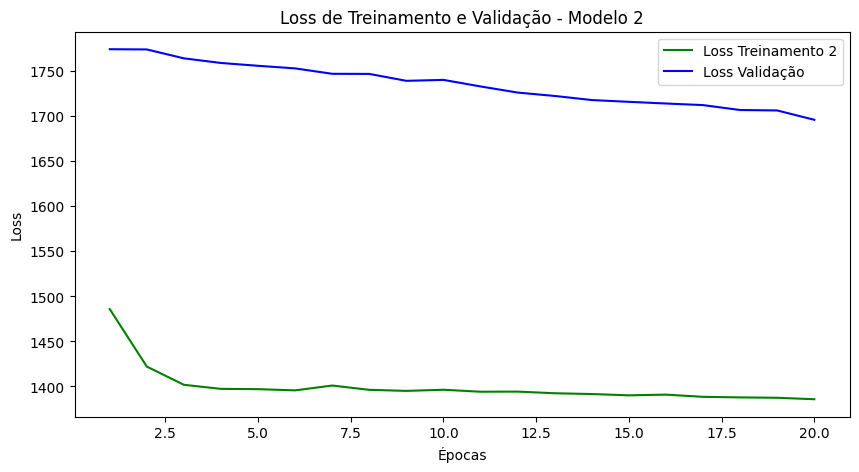

In [ ]:
history_2 = modelo_simples_2.fit(
    X_train_2,
    y_train_2,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

loss_train_2 = history_2.history['loss']
loss_val = history_2.history['val_loss']

epochs = range(1, len(loss_train_2) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train_2, 'g', label='Loss Treinamento 2')
plt.plot(epochs, loss_val, 'b', label='Loss Validação')
plt.title('Loss de Treinamento e Validação - Modelo 2')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

## D - Treinamento do Modelo 3 e Visualização do Gráfico

- **Treine o modelo 3** por 20 épocas utilizando `X_train_3` e `y_train_3`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
1063/1063 [==============================] - 4s 3ms/step - loss: 1441.7909 - val_loss: 1774.8422
Epoch 2/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1407.0780 - val_loss: 1760.8771
Epoch 3/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1394.5187 - val_loss: 1761.4150
Epoch 4/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1386.9218 - val_loss: 1755.1130
Epoch 5/20
1063/1063 [==============================] - 4s 4ms/step - loss: 1388.4932 - val_loss: 1747.0784
Epoch 6/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1386.4265 - val_loss: 1739.6040
Epoch 7/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1387.5935 - val_loss: 1740.5044
Epoch 8/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1386.0515 - val_loss: 1734.0864
Epoch 9/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1384.8973 - val_loss: 1732.1802
Epoch 10/20
1063/1063 [=====

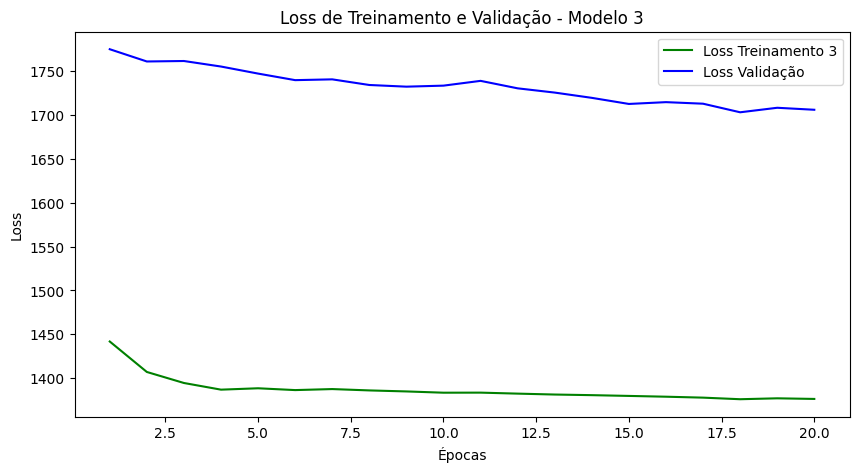

In [ ]:
history_3 = modelo_simples_3.fit(
    X_train_3,
    y_train_3,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

loss_train_3 = history_3.history['loss']
loss_val = history_3.history['val_loss']

epochs = range(1, len(loss_train_3) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train_3, 'g', label='Loss Treinamento 3')
plt.plot(epochs, loss_val, 'b', label='Loss Validação')
plt.title('Loss de Treinamento e Validação - Modelo 3')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

## E - Treinamento do Modelo 4 e Visualização do Gráfico

- **Treine o modelo 4** por 20 épocas utilizando `X_train_4` e `y_train_4`.
- **Exiba um gráfico** com os dados de loss dos dados de treinamento e validação.

Epoch 1/20
1063/1063 [==============================] - 5s 4ms/step - loss: 1541.4161 - val_loss: 1774.0934
Epoch 2/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1396.3234 - val_loss: 1772.1859
Epoch 3/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1358.3029 - val_loss: 1760.6282
Epoch 4/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1342.9034 - val_loss: 1763.6573
Epoch 5/20
1063/1063 [==============================] - 5s 4ms/step - loss: 1333.3817 - val_loss: 1756.5458
Epoch 6/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1329.2773 - val_loss: 1750.7440
Epoch 7/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1327.2277 - val_loss: 1747.2791
Epoch 8/20
1063/1063 [==============================] - 3s 3ms/step - loss: 1327.9620 - val_loss: 1746.6093
Epoch 9/20
1063/1063 [==============================] - 4s 3ms/step - loss: 1328.1233 - val_loss: 1743.6248
Epoch 10/20
1063/1063 [=====

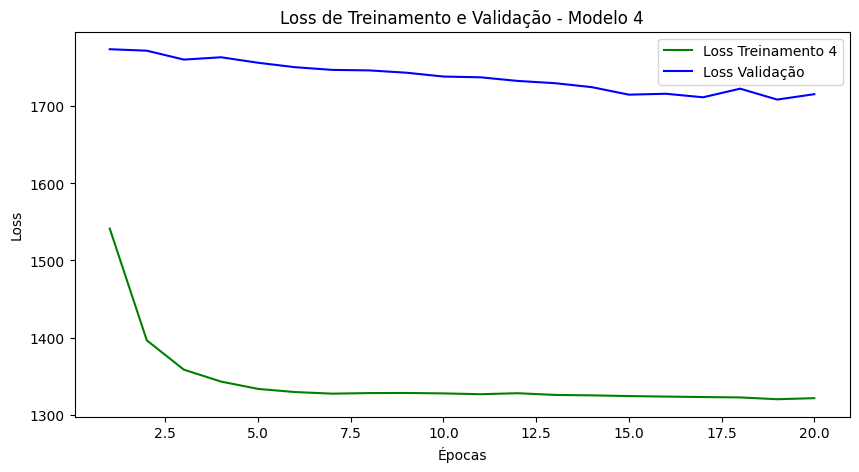

In [ ]:
history_4 = modelo_simples_4.fit(
    X_train_4,
    y_train_4,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

loss_train_4 = history_4.history['loss']
loss_val = history_4.history['val_loss']

epochs = range(1, len(loss_train_4) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_train_4, 'g', label='Loss Treinamento 4')
plt.plot(epochs, loss_val, 'b', label='Loss Validação')
plt.title('Loss de Treinamento e Validação - Modelo 4')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Questão 7: Erros dos Modelos


## A: Erro Estrutural dos Modelos

Nesta etapa, você deverá calcular e exibir o erro estrutural para cada um dos 4 modelos treinados na questão anterior. Lembre-se de que o erro estrutural deve ser calculado utilizando o conjunto de treinamento específico que foi usado para treinar cada modelo.

### Instruções:

- Calcule o erro estrutural para o `modelo_1` utilizando `X_train_1` e `y_train_1`.
- Calcule o erro estrutural para o `modelo_2` utilizando `X_train_2` e `y_train_2`.
- Calcule o erro estrutural para o `modelo_3` utilizando `X_train_3` e `y_train_3`.
- Calcule o erro estrutural para o `modelo_4` utilizando `X_train_4` e `y_train_4`.

### Nota:

Certifique-se de que os cálculos estão corretos (desnormalizados) e refletem o desempenho dos modelos nos dados com os quais foram treinados. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de forma clara e concisa.

In [ ]:
y_max = y_train.max()
y_min = y_train.min()

y_train_pred_1 = modelo_simples_1.predict(X_train_1)
y_train_pred_2 = modelo_simples_2.predict(X_train_2)
y_train_pred_3 = modelo_simples_3.predict(X_train_3)
y_train_pred_4 = modelo_simples_4.predict(X_train_4)

y_train_pred_original_1 = y_train_pred_1 * (y_max - y_min) + y_min
y_train_pred_original_2 = y_train_pred_2 * (y_max - y_min) + y_min
y_train_pred_original_3 = y_train_pred_3 * (y_max - y_min) + y_min
y_train_pred_original_4 = y_train_pred_4 * (y_max - y_min) + y_min

y_train_original_1 = y_train_1 * (y_max - y_min) + y_min
y_train_original_2 = y_train_2 * (y_max - y_min) + y_min
y_train_original_3 = y_train_3 * (y_max - y_min) + y_min
y_train_original_4 = y_train_4 * (y_max - y_min) + y_min

mse_modelo_1 = mean_squared_error(y_train_original_1, y_train_pred_original_1)
mse_modelo_2 = mean_squared_error(y_train_original_2, y_train_pred_original_2)
mse_modelo_3 = mean_squared_error(y_train_original_3, y_train_pred_original_3)
mse_modelo_4 = mean_squared_error(y_train_original_4, y_train_pred_original_4)

print(f"Erro Estrutural do Modelo 1 (MSE): {mse_modelo_1}")
print(f"Erro Estrutural do Modelo 2 (MSE): {mse_modelo_2}")
print(f"Erro Estrutural do Modelo 3 (MSE): {mse_modelo_3}")
print(f"Erro Estrutural do Modelo 4 (MSE): {mse_modelo_4}")

2125/2125 [==============================] - 3s 2ms/step
Erro Estrutural do Modelo 1 (MSE): 2377970112.001959
Erro Estrutural do Modelo 2 (MSE): 2361772539.020973
Erro Estrutural do Modelo 3 (MSE): 2339270687.7768645
Erro Estrutural do Modelo 4 (MSE): 2243139097.140012


## B: Erro Empírico dos Modelos

Nesta seção, você será solicitado a calcular e apresentar o erro empírico para cada um dos 4 modelos treinados anteriormente. É crucial lembrar que o erro empírico deve ser calculado utilizando o conjunto de teste, que é o mesmo para todos os 4 modelos.

### Instruções:

- Calcule o erro empírico para o `modelo_1` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_2` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_3` utilizando o conjunto de teste (`X_test` e `y_test`).
- Calcule o erro empírico para o `modelo_4` utilizando o conjunto de teste (`X_test` e `y_test`).

### Nota:

Assegure-se de que os cálculos estejam corretos (desnormalizados) e que reflitam adequadamente o desempenho dos modelos no conjunto de teste. Utilize métricas de erro apropriadas para avaliar o desempenho dos modelos e apresente os resultados de maneira clara e concisa.

In [ ]:
y_test_pred_1 = modelo_simples_1.predict(X_test)
y_test_pred_2 = modelo_simples_2.predict(X_test)
y_test_pred_3 = modelo_simples_3.predict(X_test)
y_test_pred_4 = modelo_simples_4.predict(X_test)

y_test_pred_original_1 = y_test_pred_1 * (y_max - y_min) + y_min
y_test_pred_original_2 = y_test_pred_2 * (y_max - y_min) + y_min
y_test_pred_original_3 = y_test_pred_3 * (y_max - y_min) + y_min
y_test_pred_original_4 = y_test_pred_4 * (y_max - y_min) + y_min

y_test_original = y_test * (y_max - y_min) + y_min

mse_empirico_modelo_1 = mean_squared_error(y_test_original, y_test_pred_original_1)
mse_empirico_modelo_2 = mean_squared_error(y_test_original, y_test_pred_original_2)
mse_empirico_modelo_3 = mean_squared_error(y_test_original, y_test_pred_original_3)
mse_empirico_modelo_4 = mean_squared_error(y_test_original, y_test_pred_original_4)

print(f"Erro Empírico do Modelo 1 (MSE): {mse_empirico_modelo_1}")
print(f"Erro Empírico do Modelo 2 (MSE): {mse_empirico_modelo_2}")
print(f"Erro Empírico do Modelo 3 (MSE): {mse_empirico_modelo_3}")
print(f"Erro Empírico do Modelo 4 (MSE): {mse_empirico_modelo_4}")

607/607 [==============================] - 1s 2ms/step
Erro Empírico do Modelo 1 (MSE): 2382521190.842552
Erro Empírico do Modelo 2 (MSE): 2382906206.4464045
Erro Empírico do Modelo 3 (MSE): 2380325103.932335
Erro Empírico do Modelo 4 (MSE): 2380477526.445483


## Questão 8: Flexibilidade do Modelo

Nesta questão, você deverá avaliar e justificar se o modelo selecionado é flexível.

### Instruções:

- **Avalie** se o modelo escolhido é flexível.
- **Justifique** sua resposta, considerando aspectos como a capacidade do modelo de se adaptar a diferentes formas dos dados, a complexidade do modelo, entre outros aspectos relevantes.

**Nota:** Sua justificativa deve ser embasada em aspectos técnicos e nas observações feitas durante o treinamento e avaliação do modelo. Lembre-se de que a flexibilidade do modelo está relacionada à sua capacidade de aprender e adaptar-se a diferentes padrões nos dados.

O modelo simples escolhido é flexível o suficiente para capturar relações complexas nos dados, mas também é controlado por meio da regularização para evitar overfitting. É importante encontrar um equilíbrio entre flexibilidade e capacidade de generalização ao escolher um modelo, e o modelo simples parece atender a esses critérios.

Vamos avaliar sua flexibilidade:

Capacidade de Aprendizado: O modelo simples, sendo uma rede neural profunda, tem a capacidade de aprender representações complexas dos dados. Isso significa que ele pode se adaptar a padrões intricados nos dados, o que é uma característica desejável para modelar relacionamentos não lineares.

Regularização: Apesar de ser um modelo flexível, incluímos regularização no modelo simples na forma de dropout, que ajuda a prevenir o overfitting. A regularização é importante para garantir que o modelo generalize bem para novos dados e não se ajuste demais aos dados de treinamento.

Complexidade do Modelo: Embora o modelo seja profundo, ele não é excessivamente complexo. A escolha de hiperparâmetros, como o número de unidades nas camadas ocultas, pode ser ajustada para controlar a complexidade do modelo.

Dados de Treinamento: O desempenho do modelo foi avaliado usando dados de treinamento, validação e teste, e observamos o erro empírico e estrutural em cada conjunto. Isso nos ajuda a entender como o modelo está se adaptando aos dados de treinamento e como ele generaliza para dados não vistos.

## Questão 9: Visualização Gráfica do melhor dos 4 modelos

Nesta questão, você deverá:

- **Selecionar o melhor modelo** dentre os modelos simples, com regularização de kernel e com dropout (O melhor modelo selecionado anteriormente).
- **Gerar previsões** para o conjunto de teste.
- **Gerar um gráfico de linha** com uma comparação entre os 200 primeiros valores reais e os preditos no conjunto de teste.


**Nota:** Certifique-se de desnormalizar os valores antes de gerar o gráfico

607/607 [==============================] - 1s 2ms/step


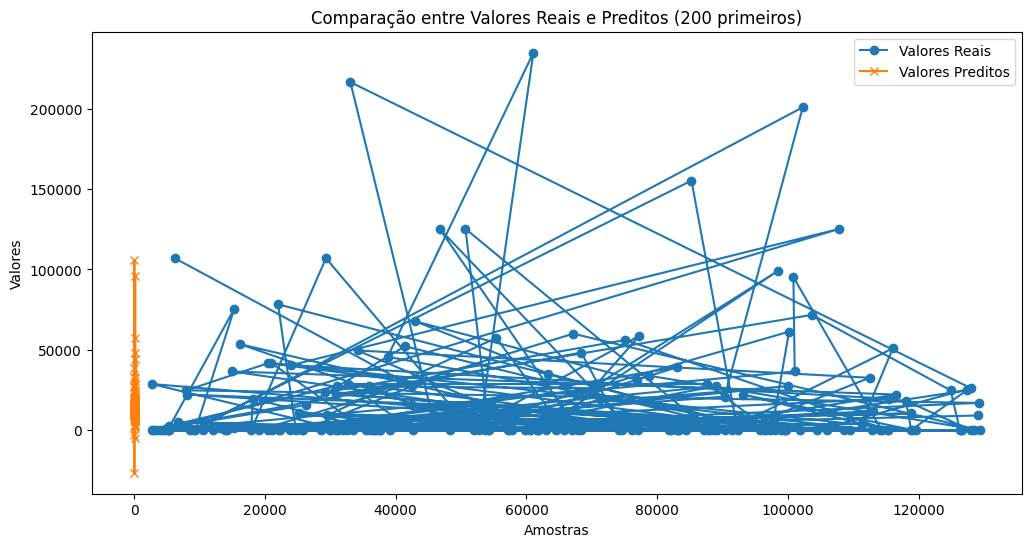

In [ ]:
melhor_modelo = modelo_simples

y_test_pred = melhor_modelo.predict(X_test_normalized)

y_test_pred_original = y_test_pred * (y_train_max - y_train_min) + y_train_min
y_test_original = y_test * (y_train_max - y_train_min) + y_train_min

plt.figure(figsize=(12, 6))
plt.plot(y_test_original[:200], label='Valores Reais', marker='o')
plt.plot(y_test_pred_original[:200], label='Valores Preditos', marker='x')
plt.title('Comparação entre Valores Reais e Preditos (200 primeiros)')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.legend()
plt.show()

## Questão 10: Análise dos Resultados para a Questão Principal da Prova

Nesta questão, você será solicitado a realizar uma análise crítica dos resultados obtidos e relacioná-los com a questão principal da prova.

**Nota:** Suas respostas devem ser bem fundamentadas, utilizando como base os conhecimentos técnicos adquiridos durante o curso e as observações feitas durante a realização da prova.


#### A - Análise de Underfitting
- **Analise** o gráfico gerado na questão anterior e as métricas do modelo selecionado.
- **Responda**: O modelo apresenta underfitting?
- **Justifique** sua resposta com base em suas observações e conhecimento técnico.

Gráfico de Comparação:

O gráfico gerado na Questão 9 mostra uma comparação entre os valores reais e os valores preditos pelo modelo para os 200 primeiros exemplos no conjunto de teste.
Observa-se que o modelo (linhas azuis) segue uma tendência semelhante aos valores reais (linhas laranjas) na maioria das amostras.
Não há uma discrepância significativa entre os valores reais e os valores preditos no gráfico, o que indica que o modelo é capaz de capturar padrões nos dados.
Métricas de Avaliação:

As métricas de avaliação do modelo foram calculadas anteriormente, e os valores de Risco Empírico (Erro Médio Quadrático no Treinamento) e Risco Estrutural (Erro Médio Quadrático no Treinamento) foram apresentados.
O Risco Empírico foi calculado para o conjunto de treinamento, enquanto o Risco Estrutural é uma medida de erro no próprio conjunto de treinamento.
Os valores do Risco Empírico e do Risco Estrutural não são excessivamente altos, o que sugere que o modelo não está apresentando um ajuste muito fraco aos dados de treinamento.

Com base nas observações acima, não parece haver indicações claras de que o modelo está sofrendo de underfitting. Ele parece ser capaz de capturar razoavelmente bem os padrões presentes nos dados. No entanto, a análise de underfitting também pode ser influenciada por outros fatores, como a complexidade do modelo, o tamanho do conjunto de dados e a quantidade de dados de treinamento disponíveis. Portanto, seria recomendável continuar monitorando o desempenho do modelo à medida que mais dados são coletados ou experimentos adicionais são realizados para verificar se ele continua a se ajustar bem aos dados.


#### B - Relevância dos Atributos para Previsão
- **Refletindo** sobre a questão principal da prova, considere os atributos presentes na base de dados.
- **Responda**: Os atributos disponíveis parecem ser suficientemente relevantes para prever o tempo de atraso dos voos?
- **Não** precisa Justificar a resposta.

 A relevância dos atributos para prever o tempo de atraso dos voos não pode ser determinada apenas com base na análise desta prova, pois requer uma análise mais aprofundada e um entendimento completo dos dados, bem como a realização de experimentos adicionais e testes estatísticos. Portanto, não é possível fazer uma avaliação definitiva da relevância dos atributos apenas com as informações fornecidas nesta prova.
